In [107]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [108]:
def function(x):
    return 5*x**3-8*x**2-7*x+1

In [109]:
# x=np.arange(-20,20,.1)
x=np.random.uniform(-20,20,1000)
y=function(x)
# y

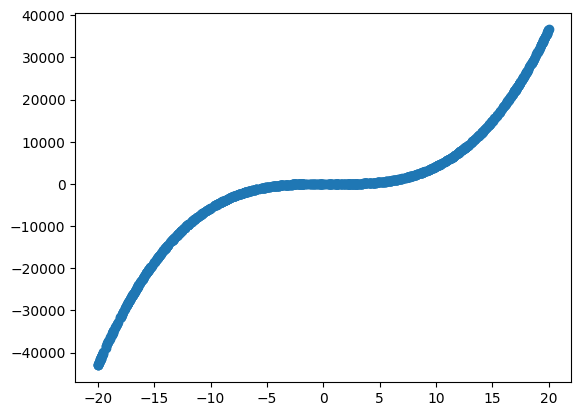

In [110]:
x_max=np.max(np.abs(x))
y_max=np.max(np.abs(y))
x_nor=x/x_max
y_nor=y/y_max
# x_nor
# y_nor
plt.scatter(x,y)

Train : 950
Test : 50


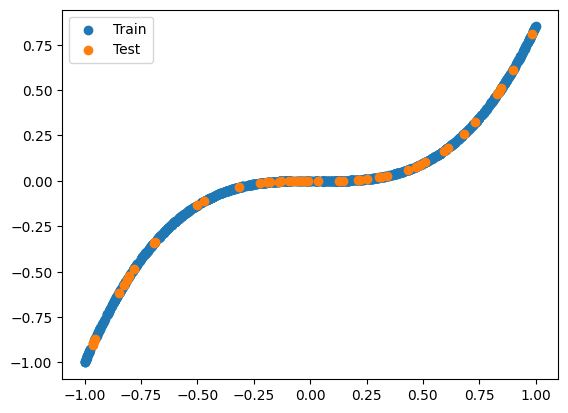

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x_nor,y_nor,test_size=.05,random_state=40)
print(f"Train : {len(x_train)}")
print(f"Test : {len(x_test)}")
plt.scatter(x_train,y_train,label="Train")
plt.scatter(x_test,y_test,label="Test")
plt.legend()

In [125]:
model = keras.Sequential([
    # keras.layers.Input([1]),
    keras.layers.Dense(32,input_shape=[1],activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='linear'),
])
model.summary()

C:\Users\Sami\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error',metrics=[tf.keras.metrics.R2Score(name="accuracy")])

In [115]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.05)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0121 - loss: 0.1291 - val_accuracy: 0.1862 - val_loss: 0.1234
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2604 - loss: 0.0925 - val_accuracy: 0.3801 - val_loss: 0.0940
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4288 - loss: 0.0739 - val_accuracy: 0.5367 - val_loss: 0.0703
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5472 - loss: 0.0604 - val_accuracy: 0.6524 - val_loss: 0.0527
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - loss: 0.0429 - val_accuracy: 0.7376 - val_loss: 0.0398
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7431 - loss: 0.0330 - val_accuracy: 0.7978 - val_loss: 0.0307
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: 0.0252 - val_accuracy: 0.8343 - val_loss: 0.0251
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8227 - loss: 0.0238 - val_accuracy: 0.8587 - val_loss:

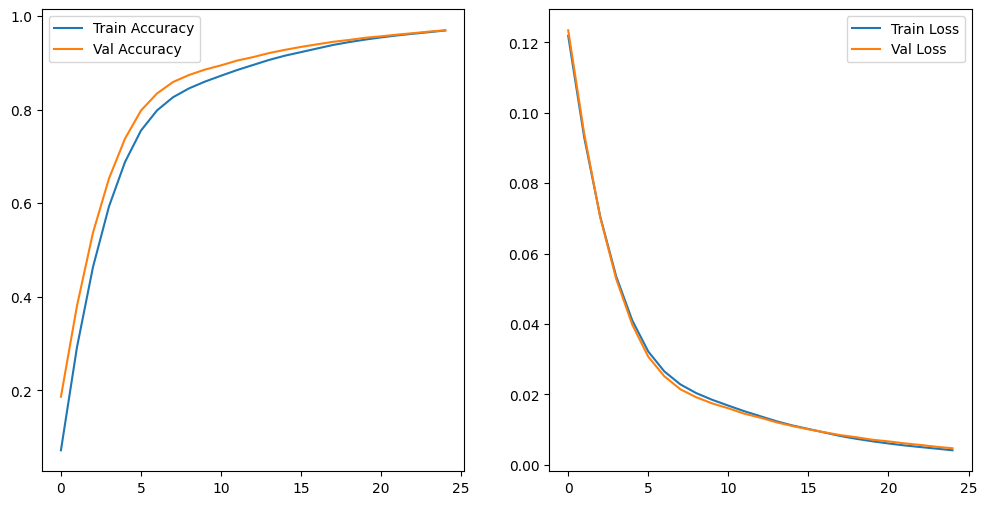

In [116]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Train Accuracy")
# plt.legend()
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'],label="Val Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Train Loss")
# plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'],label="Val Loss")
plt.legend()
plt.show()

In [117]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9728 - loss: 0.0040


[0.004046402405947447, 0.9728124141693115]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


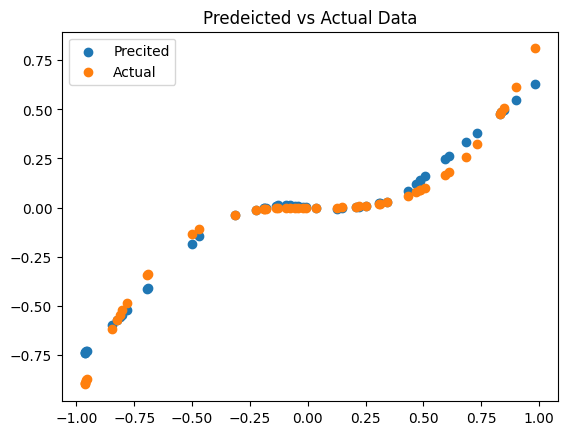

In [118]:
y_predict = model.predict(x_test)

plt.scatter(x_test,y_predict,label="Precited")
plt.scatter(x_test,y_test,label="Actual")
plt.title('Predeicted vs Actual Data')
plt.legend()
plt.show()